## Cleaning !

- Using `Series.map(), Series.apply(), DataFrame.applymap(),DataFrame.apply(), pd.melt()`

- in `rename(), inplace=True` returns None, `inplace=False` returns the object with operation performed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

happiness2015 = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/World_Happiness_2015.csv')
happiness2016 = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/World_Happiness_2016.csv')
happiness2017 = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/World_Happiness_2017.csv')
# to rename it
# happiness2015.info()
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
happiness2015 = happiness2015.rename(mapping, inplace=False, axis=1)



- `Series.map(function_name), Series.apply(function_name)` method
- take the function as parameter

In [2]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

# both map(), apply() pass the fuction as parameter     
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)

equal = economy_impact_map.equals(economy_impact_apply)
equal

True

- `Series.map(), Series.apply()` function don't modify the original series. if we want, we must assign the result back to the original column or create new column

    - we pass argument `x` as the second parameter using `apply(label, x), map(label,x)` will get error

In [3]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
# create new column 'Economy Impact'    
happiness2015['Economy Impact'] = happiness2015['Economy'].apply(label)


# check if we pass another argument named x
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8)

- apply `DataFrame.applymap()` method
- `DataFrame.applymap(function_name)`
- `df.applymap()` can apply multiple column at once

In [15]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

happiness2015['Economy Impact'] = happiness2015['Economy'].apply(label)
happiness2015['Health Impact'] = happiness2015['Health'].apply(label)
happiness2015['Family Impact'] = happiness2015['Family'].apply(label)

# create list
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)
print(factors_impact.head(10))

  Economy Family Health Freedom Trust Generosity
0    High   High    Low     Low   Low        Low
1    High   High    Low     Low   Low        Low
2    High   High    Low     Low   Low        Low
3    High   High    Low     Low   Low        Low
4    High   High    Low     Low   Low        Low
5    High   High    Low     Low   Low        Low
6    High   High    Low     Low   Low        Low
7    High   High    Low     Low   Low        Low
8    High   High    Low     Low   Low        Low
9    High   High    Low     Low   Low        Low


- `df.apply()` only applies column or row along a axis. we set it up to a series, most commonly a column
- 

In [14]:
factors_impact.apply(pd.value_counts)
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


- `df.apply(v_counts)`
- `v_counts(col)` counts each column
- `col.value_counts` is `Series.value_counts` in this case, each column

In [6]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num / den

v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


- Calculate the sum of the factor columns in each row

In [7]:
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health'
                                              , 'Freedom','Trust', 'Generosity'
                                              , 'Dystopia Residual']]. sum(axis=1)
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


In [12]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col / happiness2015['Happiness Score']
    div = div * 100
    return div
factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


- `pd.melt()` function
- `pd.melt(df, id_vars=[col1, col2], value_vars=[col3, col4])` 
- col1, col2: names of the columns that should remain in the result
- col3, col4: names of the columns should be changed to row in the result
- reshaping the structure

In [13]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)
# melt
melt['Percentage'] = round(((melt['value'] / melt['Happiness Score']) * 100) ,2)
melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


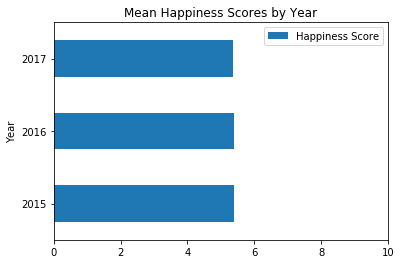

In [10]:
happiness2016 = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/World_Happiness_2016.csv')
happiness2017 = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/World_Happiness_2017.csv')
# to rename it
# happiness2015.info()
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017


happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
#Concatenate happiness2015, happiness2016, and happiness2017.
combined = pd.concat([happiness2015, happiness2016, happiness2017], sort=False)

#Create a pivot table lising the mean happiness score for each year. Since the default aggregation function is the mean, we excluded the `aggfunc` argument.
pivot_table_combined = combined.pivot_table(index = 'Year'
                                            , values = 'Happiness Score', aggfunc=np.mean)

#Plot the pivot table.
pivot_table_combined.plot(kind ='barh', title='Mean Happiness Scores by Year', xlim = (0,10))

Let's reapeat the above insetad of `Year` we will group by `variable`

,value
variable,
Dystopia Residual,2.098977
Economy,0.846137
Family,0.991046
Freedom,0.428615
Generosity,0.237296
Health,0.630259
Trust,0.143422


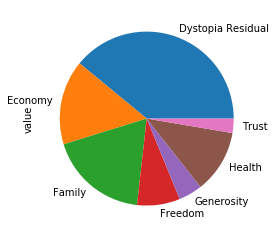

In [11]:
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)
pv_melt